### <center> PAP Otoño 2020 | Optimización de Programas de Inversión en Intermediarios Financieros <center>
***

# <center> Sistema de Trading con Cobertura <center>
***
#### <center> Seminario de Investigación de Ingeniería Financiera <center>




# Objetivo (1)
***


- El principal objetivo de un sistema de trading es maximizar sus beneficios utilizando señales y confirmaciones de tendencia que ayuden a mejorar el porcentaje de entradas y salidas apropiadas. 


- La fuente de estas señales proviene del desarrollo de un modelo de inteligencia artíficial basado en una red neuronal multicapa, cuyo entrenamiento utiliza datos diario de contratos futuros continuos.


- Para mejorar el desempeño del sistema se toma en cuenta un criterio de selección e importancia de variables, conocido como ingeniería de variables, así como una optimización de parámetros internos para el modelo. 



# Objetivo (2)
***
- Finalmente con el fin de disminuir la minusvalía de la posiciones abiertas, se propone la implementación de una cobertura dinámica utilizando opciones como una alternativa para preservar el capital y gestionar el riesgo. 


- El impacto de esta investigación va dirigida a contribuir e innovar el proceso de estrategias de inversión que realizan actualmente los fondos de pensión en México (AFORES). Siendo el rendimiento un factor determinante para el retiro de futuras generaciones. En donde tomando en cuenta el contexto actual y recientes reformas en la materia, se ha convertido en una problemática de suma importancia hoy en día para nuestra sociedad. 

# <center> Temario <center>
***
1. Sistema de pensiones y AFORES en México
2. Creación del conjunto de datos y diferenciación fraccional
3. Change point detection
4. Feature engineering y feature importance
5. Modelo de red neuronal multicapa y optimización de hiperparámetros
6. Cobertura dinámica

# <center> Sistema de Pensiones y AFORES en México (1) <center>
***
- El sistema de ahorro para el retiro es una problemática para gran parte de la población mexicana que tienen un empleo formal.
    
    
- A lo largo del semestre se ha trabajado en la investigación e implementación de un sistema de trading que pueda tener un impacto positivo en las inversiones de las personas, las cuales son administradas por medio de las Administradoras de Fondos para el Retiro (AFORES)

# <center> Sistema de Pensiones y AFORES en México (2) <center>
***
- Al optimizar el modelo se espera que aumenten los rendimientos y se reduzca el riesgo, lo cual afectaría de manera positiva a las personas económicamente activas que tienen su fondo de ahorro para el retiro.

# <center> Creación del Conjunto de Datos <center>
***

El sistema de trading que estamos desarrollando requiere datos de los contratos de futuros **"E-mini Euro FX"** negociados en la plataforma electrónica CME Globex

Se consideraron dos opciones para obtener un histórico de las transacciones de este producto:

1. CME Datamine
2. FirstRate


- **FirstRate** nos provee una serie por minuto de datos continuos iniciando el 14 de diciembre de 2006 y finalizando el 30 de octubre de 2020. Además, entrega los datos de cada contrato empezando con el MEH08 (Contrato que venció en Marzo 2008).


- La serie de datos continuos es creada mediante la unión de los contratos con la fecha de vencimiento más cercana. El cambio de un contrato al siguiente, se realiza el último día de cotización del contrato que vence. A su vez, los precios son ajustados de acuerdo al diferencial en la fecha de cambio.

## <center> Conversión de Granularidad <center>
---

In [ ]:
import pandas as pd
from Sistema_Trading_Cubierto import data as dt

column_names = ["TimeStamp", "open", "high", "low", "close", "volume"]
df_raw = pd.read_csv('files/ME_2020.csv',
                      header=1,
                      names=column_names, 
                      parse_dates=["TimeStamp"],
                      index_col=["TimeStamp"])
df_daily = dt.load_data(start=2018, end=2020, freq='D')
df_hourly = dt.load_data(start=2018, end=2020, freq='H')


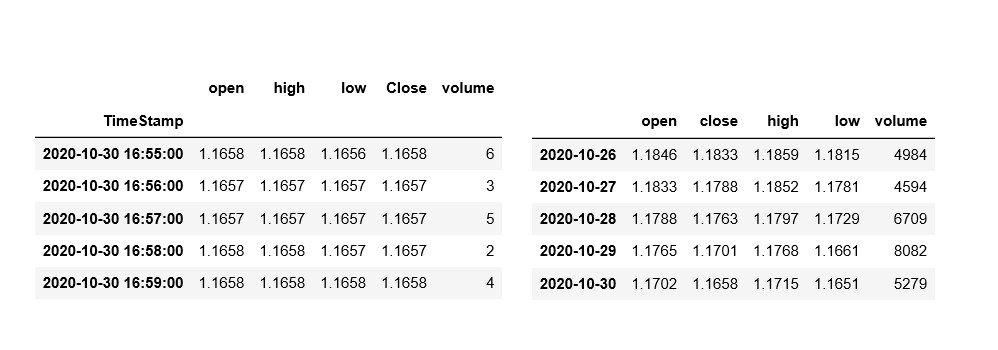

# <center> Diferenciación Fraccional </center>
---

- Una práctica común en ML es pre-procesar los datos para que la serie con la que se va a trabajar sea estacionaria (media y varianza constante)

- La forma más popular de convertir una serie no estacionaria en estacionaria es mediante las diferencias, es decir los rendimientos (naturales o logarítmicos)

- Al hacer esto, se pierde casi por completo la **memoria** de la serie

- Las series financieras tienen memoria, lo cual es importante considerar si lo que queremos es hacer predicciones sobre ella

- Entonces, si **ganamos estacionariedad perdemos memoria**, pero si conservamos memoria no tenemos estacionariedad
---
    
#### <center>¿Habrá una manera de diferenciar, tal que obtengamos una serie estacionaria y conservemos la memoria de la serie original?

Uniendo los conceptos de expansión mediante Serie de Taylor, y el operador rezago  $B$ donde $B^{k}X_{t} = X_{t-k}$ obtenemos lo siguiente:

<center>$(1-B)^{d} = 1 - dB + \frac{d(d-1)}{2!}B^{2} - \frac{d(d-1)(d-2)}{3!}B^{3} + ...$
    
Donde $(1-B)^{d}$ es la **diferenciación** de una serie y $d$ representa el factor de diferenciación que estamos aplicando
    
<br/>

Por lo tanto, los **coeficientes** de cada $B^{n}$ se pueden expresar como

<center> $w_{k} = -w_{k-1}\frac{d-k+1}{k}$
    
Lo cual nos permite utilizar un numero entre $(0,1)$ para el grado de diferenciación $d$ 

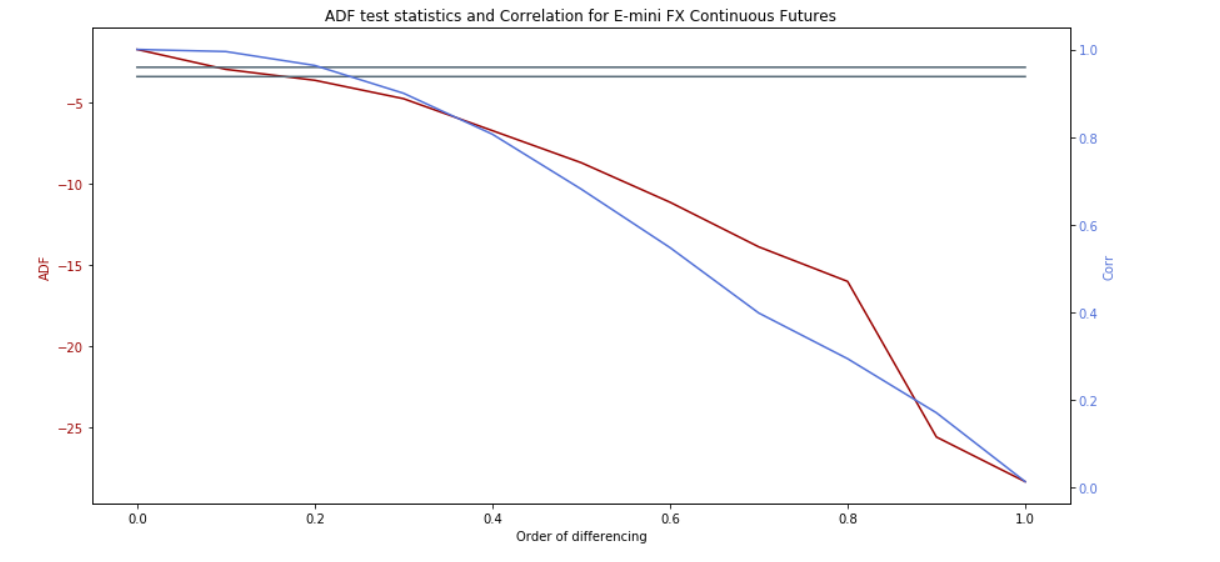

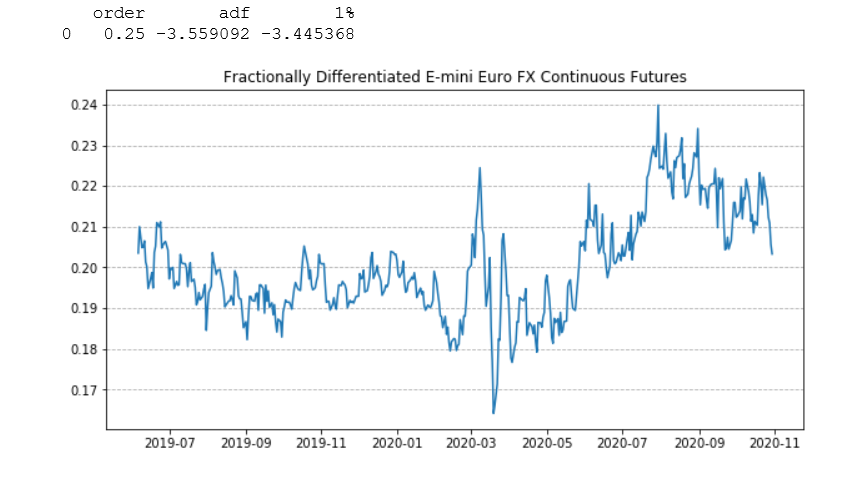

# <center> Change Point Detection <center> 
---
<center>  Análisis estadistico, su función es detectar los puntos en donde el proceso estócastico o la serie de tiempo cambia.<center> 
    

- **Métodos**: Window, binary, PELT.

- **Resultado de los métodos**: Anomalías dentro de la serie de tiempo, fechas en donde ocurrió el cambio y lista de variables dummy, donde 1 es un change point y el 0 sin anomalía.

- **Entradas**: Dataframe que contenga una columna *close*.

- **Librería**: *ruptures* 


    
- **Window**: se utiliza para realizar una segmentación rápida de la señal. El algoritmo utiliza dos ventanas que se deslizan a lo largo del flujo de datos. Las propiedades estadísticas de las señales dentro de cada ventana se comparan con una medida de discrepancia.


- **Binary**: La segmentación binaria es el método estándar a lo relacionado a change point detection. Básicamente, aplica iterativamente el change point a diferentes subconjuntos de la secuencia y1….,yn con el objetivo de detectar múltiples puntos de cambio. 


- **PELT**: Es un método exacto y genera resultados rápidos y consistentes. Minimiza la función de costo sobre posibles puntos de cambio. Este método tiene costo computacional lineal a cada uno de los puntos dentro de la secuencia de precios. Para tener una mayor potencia del método se necesitarán un número mayor de datos. Si un cambio es muy grande, existen mayores posibilidades de que el método encuentre ese punto exacto.



# <center> Feature Engineering </center>
---

    
El proceso de *Feature Engineering (FE)* se sustena en la generación de un conjunto de nuevas características diseñadas a partir de OHLC normalizadas, en este proyecto se utilizaron transformaciones matemáticas en dominio cuantitativo del coseno,seno,exponente,raíces, por nombras algunas y variables clave como rendimientos, rendimientos acumulados, change point detection, **indicadores técnicos y financieros** que son los principales analizados en la literatura financiera bursátil. 


## <center> Función Convergente de FE</center>

In [ ]:
def add_all_features(df_pe):
    # Add fracdiff features
    df_pe = Add_features.add_fracdiff_features(df_pe, threshold = 1e-4)
    # Technical Indicators
    df_pe['CCI'] = Add_features.CCI(df_pe, 14) # Add CCI
    df_pe['SMA_5'] = Add_features.SMA(df_pe, 5)
    df_pe['SMA_10'] = Add_features.SMA(df_pe, 10)
    df_pe['MACD'] = Add_features.df_pe['SMA_10']-df_pe['SMA_5']
    df_pe['Upper_BB'], df_pe['Lower_BB'] = Add_features.BBANDS(df_pe, 10)
    df_pe['Range_BB'] = (df_pe['Close']-df_pe['Lower_BB'])/(df_pe['Upper_BB']-df_pe['Lower_BB'])
    df_pe['RSI'] = Add_features.RSI(df_pe, 10)
    df_pe['Max_range'] = Add_features.price_from_max(df_pe, 20)
    df_pe['Min_range'] = Add_features.price_from_min(df_pe, 20)
    df_pe['Price_Range'] = Add_features.price_range(df_pe, 50)
    df_pe['returna'], df_pe['returna_acums'], df_pe['returnlog'], df_pe['returnlog_acum'], df_pe['binary'] = Add_features.ret_div(df_pe)
    df_pe['zscore'] = Add_features.z_score(df_pe)
    df_pe['diff1'] , df_pe['diff2'] , df_pe['diff3'] , df_pe['diff4'] , df_pe['diff5'] = Add_features.int_diff(df_pe,np.arange(1,6))
    df_pe['mova1'] , df_pe['movaf2'] , df_pe['mova3'] , df_pe['mova4'] , df_pe['mova5'] = Add_features.mov_averages(df_pe,np.arange(1,6))
    df_pe['quartiles'] = Add_features.quartiles(df_pe,10)
    return df_pe

## <center> Feature Importance </center>
---
*Feature Importance (FI)* de filtrado, como lo es el proceso de prueba de **Análisis de Varianza**, brinda una selección de importancia de variables, a partir de una perspectiva estadística, lo que permitirá involucrar aquellas variables que cumplan la regla del **p-value**, que serán las que nos brinden un aporte óptimo para la analítica predictiva que buscamos con ANN.  

In [ ]:
def ANOVA_importance(df,
                     sample:float,
                     VO:str):
    
    '''
    Return the index of the variables with the most
    statistical significance with p-value approach
    There is F statistical approach'''

    long = int(round(len(df) * sample))

    X = df.drop(VO, axis=1)
    y = df[VO]

    #select train and test data
    X_train , X_test , y_train , y_test = X.iloc[:long,:] , X.iloc[long:,:] , \
                                                y.iloc[:long], y.iloc[long:]

    #train model
    constant_filter = VarianceThreshold(threshold=0.01)
    constant_filter.fit(X_train)
    #print(constant_filter)
    X_train_filter = constant_filter.transform(X_train)
    X_test_filter = constant_filter.transform(X_test)

# <center> Modelo AI: Red Neuronal Multicapa </center>
---

* Red neuronal multicapa con propagación hacia atrás.
* Resultado del modelo : 
  * 0 -> precio bajista.
  * 1 -> precio alcista.
  
* Entradas :
    * Resultados del feature engineering y feature importance.
    * Ventana de tiempo para el entrenamiento del 01/01/2007 - 23/03/2020.
 
* Tipo de aprendizaje : **supervisado**.
* Funcion de costo : entropia cruzada binaria.
* Función de activación :sigmoide.

## <center> Creación de la Red Neuronal Multicapa </center>
---

In [ ]:
def createNN(neuron_pctg,lr,layer_pctg):
    model = Sequential()
    nneurons = float(neuron_pctg) * 100  
    nlayers = float(layer_pctg)*75
    layer_counter = 0
    model.add(Dense(115,activation="sigmoid",input_shape=(114,))) 
    while nneurons<=10 and layer_counter < nlayers:
        model.add(Dense(nneurons, activation="sigmoid"))
        model.add(Dropout(0.5))
        layer_counter += 1
    model.add(Dense(1,activation="sigmoid"))
    opt = keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=["accuracy"])
    return model

## <center> Optimización de Hiperparámetros <center>

*** 

* Atributos propios de la arquitectura del modelo.
* Los hiperparámetros tienen un efecto directo en la calidad del modelo.
* Hiperparámetros considerados hasta el momento : 
 * Tasa de aprendizaje.
 * Número de capas ocultas.
 * Neuronas por capa oculta.
 * Tamaño del lote.
 * Dropout.
* Método de optimización : PSO.  
* Resultado de la optimización : red neuronal entrenada con los hiperparámetros óptimos.

In [ ]:
param_dict ={
    'learning_rate': {
                    'start':100,
                   'stop':10000,
                    'step':100,
                   'scale':10000,
                   },
    'neuron percentage': { 
                    'start':50,
                    'stop': 100,
                    'step':2,
                    'scale':10
                            },
    'layer percentage':{
                    'start':50,
                    'stop':101,
                    'step':2,
                    'scale':10
                        },
    'batch size':{
                'start':0,
                'stop':50,
                'step':2,
                'scale':1
                        },
        'dropout':{
                'start':0,
                'stop':50,
                'step':2,
                'scale':100

        }
model = OptimizationTools.optimizeNN(param_dict,25,15,x_train,y_train,epochs=10)   

In [ ]:
for i in range(0, iter):

    for j in range(0, n_particles):
        if x1p["learning_rate"][j]>0:

            model = Models.createNN(lr=float(x1p["learning_rate"][j]), neuron_pctg=float(x1p["neuron percentage"][j])
                                    , layer_pctg=float(x1p["layer percentage"][j]),dropout=float(x1p["dropout"][j]))
        else :
            model = Models.createNN(lr=float(x1p["learning_rate"][j])+.1,
                                    neuron_pctg=float(x1p["neuron percentage"][j])
                                    , layer_pctg=float(x1p["layer percentage"][j]))


        csv_logger = CSVLogger('log' + str(j) + '.csv', append=False,
                               separator=';')
        model.fit(x_train, y_train, epochs=epochs, batch_size=int(x1p["batch size"][j]), verbose=1,
                  callbacks=[csv_logger], shuffle=False)
        to_read = 'log' + str(j) + '.csv'
        fx = (pd.read_csv("C:/Users/anuno/OneDrive/Documents/ITESO/PAP 2/" + to_read,
                          sep=';', usecols=["loss"]))
        fx = fx.rename(columns={'loss': 'loss' + str(j)})

        if j == 0:
            history = fx
        else:

            history = pd.concat([history, fx], axis=1, sort=False)
    fx = pd.DataFrame(trainProcess_min(history))
    [val, idx] = fx.min(), fx.idxmin()[0]

# <center> Cobertura Dinámica (1) </center>
---
**Prima de una opción**
   - Valor intrínsico, extrínsico y time-decay
    
    
**Criterio para la selección de opciones**
   - Delta 50% = ITM 
   - Compra de opciones dónde,
       - *buy = put* | *sell = call*
    
    
**Información y parámetros para las opciones**
   - Opciones EUR-USD semanales
   - Información histórica de QuikStrike CME
    


# <center> Cobertura Dinámica (2) </center>
***

**Implementación y parámetros iniciales**
   - Contrato y especificaciones 
       - Tick size 
       - Tick USD
       - Número de contratos
       - Margen
       - Costo primas
       - TP y STP 

**Escenarios y backtesting**
   - Historial de señales
   - Simulación 
   - Ventajas y limitaciones

In [ ]:
#Balance
balance = 1000000

#Unidades por contrato
size_opt= 125000 
size_fut = 62500 

#Contratos futuros
future=round(balance/S0,2) #Tipo de cambio
future_num = round(future/size_fut,0) #Número de contratos

#Margen mantenimiento +10% = margen inicial
margin_mant = 1450 
margin_init = margin_mant*1.1 #1590

#Contratos de opciones 
opt_num = round(future/size_opt,0) 

#Mínima fluctuacion
tick_size = 0.0001
tick_usd_fut = 6.25

In [10]:
# Liberías
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import time
import matplotlib.dates as mpl_dates
import pandas_datareader.data as web


%matplotlib inline
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing
init_printing()

In [15]:
# Display dataframe
def displaydf(dataframe, cols = None, rows = 20):
    with pd.option_context("display.max_columns", cols):
        with pd.option_context("display.max_rows", rows):
            display(dataframe)
    return True

In [111]:
# Importar los datos
backtest = pd.read_csv(r"C:\Users\andreaji-c\Documents\ITESO\PAP\Backtest.csv")

long_put = pd.read_csv(r"C:\Users\andreaji-c\Documents\ITESO\PAP\scenario2_longput.csv")
long_put = long_put.set_index('Date')


### <center> 1. Escenario #1: Sell: long-call <center>
***

In [60]:
long_call = backtest.loc[(backtest.Date>="3/24/2020") & (backtest.Date<"3/31/2020")]
long_call = long_call.set_index('Date')
displaydf(long_call)

,Position,Price,Strike,Time,Delta,Prime,Prime $,Symbol,Chg. Price,P&L Exposed,P&L Hedged,Balance sin Cobertura,Balance con Cobertura,Rend. Sin Cobertura,Rend. Con Cobertura,Ratio
Date,,,,,,,,,,,,,,,,
3/24/2020,sell,1.080,1.08,8,0.503,0.009,7525.0,WE1J0,0.000,0.0,7525.0,100000.0,92475.0,0.000,-0.075,0.92
3/25/2020,sell,1.091,1.08,7,0.738,0.014,11900.0,WE1J0,-0.011,-9538.0,2362.0,90462.0,94837.0,-0.095,-0.052,1.05
3/26/2020,sell,1.108,1.08,6,0.924,0.029,25113.0,WE1J0,-0.017,-15006.0,10106.0,84994.0,102581.0,-0.150,0.026,1.21
3/27/2020,sell,1.116,1.08,5,0.969,0.036,31500.0,WE1J0,-0.008,-6737.0,24763.0,93263.0,117238.0,-0.067,0.172,1.26
3/30/2020,sell,1.106,1.08,2,0.964,0.027,23275.0,WE1J0,-0.025,-21875.0,1400.0,78125.0,93875.0,-0.219,-0.061,1.20


True

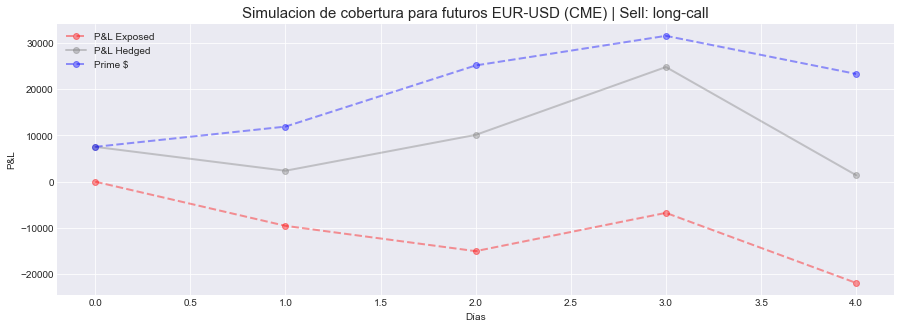

In [137]:
#Gráfica
plt.figure(figsize=(15,5))
ax=plt.axes()
plt.plot(long_call["P&L Exposed"], lw=2,color="red",linestyle="--", label='P&L Exposed', marker='o', alpha=0.4)
plt.plot(long_call["P&L Hedged"], lw=2,color="grey", label='P&L Hedged', marker='o', alpha=0.4)
plt.plot(long_call["Prime $"], lw=2, color="blue",linestyle="--",label='Prime $', marker='o', alpha=0.4)
plt.legend(loc='best', fontsize=10)
plt.title("Simulacion de cobertura para futuros EUR-USD (CME) | Sell: long-call",fontsize=15)
plt.xlabel('Días', fontsize=10)
plt.ylabel('P&L',fontsize=10)
plt.style.use("seaborn-darkgrid")
blue, = sns.color_palette("muted", 1)

### <center> 1. Escenario #2: Buy: long-put <center>
***

In [106]:
displaydf(long_put)

,Position,Price,Strike,Time,Delta,Prime,Prime $,Symbol,Chg. Price,P&L Exposed,P&L Hedged,Balance sin Cobertura,Balance con Cobertura,Rend. Sin Cobertura,Rend. Con Cobertura,Ratio
Date,,,,,,,,,,,,,,,,
3/31/2020,buy,1.105,1.105,8,-0.498,0.007,6125,WE2J0,0.000,0,6125,78125,87750,-0.219,-0.122,1.12
4/1/2020,buy,1.096,1.105,7,-0.714,0.012,10675,WE2J0,-0.009,-8094,2581,70031,90331,-0.300,-0.097,1.29
4/2/2020,buy,1.087,1.105,6,-0.872,0.019,16363,WE2J0,-0.018,-15444,919,62681,88669,-0.373,-0.113,1.41
4/3/2020,buy,1.083,1.105,5,-0.942,0.022,19250,WE2J0,-0.022,-18856,394,59269,88144,-0.407,-0.119,1.49
4/6/2020,buy,1.082,1.105,2,-0.979,0.023,20213,WE2J0,-0.023,-20038,175,58087,87925,-0.419,-0.121,1.51
4/7/2020,buy,1.093,1.105,1,-0.973,0.012,10850,WE2J0,-0.012,-10675,175,67450,87925,-0.326,-0.121,1.30


True

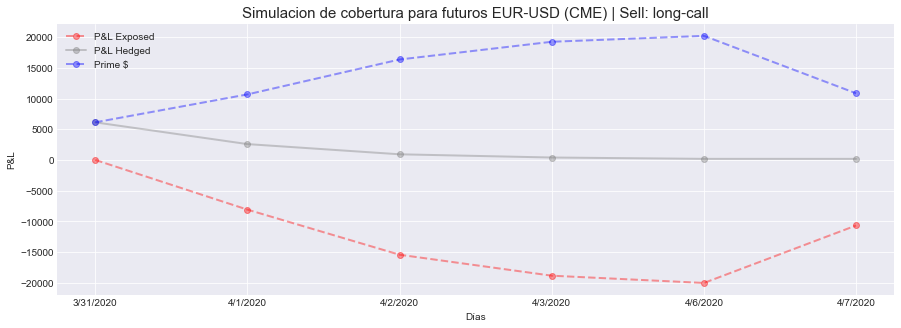

In [136]:
#Gráfica
plt.figure(figsize=(15,5))
ax=plt.axes()
plt.plot(long_put["P&L Exposed"], lw=2,color="red",linestyle="--", label='P&L Exposed', marker='o', alpha=0.4)
plt.plot(long_put["P&L Hedged"], lw=2,color="grey", label='P&L Hedged', marker='o', alpha=0.4)
plt.plot(long_put["Prime $"], lw=2, color="blue",linestyle="--",label='Prime $', marker='o', alpha=0.4)
plt.legend(loc='best', fontsize=10)
plt.title("Simulacion de cobertura para futuros EUR-USD (CME) | Sell: long-call",fontsize=15)
plt.xlabel('Días', fontsize=10)
plt.ylabel('P&L',fontsize=10)
plt.style.use("seaborn-darkgrid")
blue, = sns.color_palette("muted", 1)

### <center> Umbral <center>
---
    
$$ \left[\frac{( prima\:$ \times numero\:de\:opciones)}{tick\:usd}\right] \times tick\:size=umbral $$

---
##### <center> Sell <center>
$$S0 - umbral$$
 
##### <center> Buy <center>
$$S0 + umbral$$



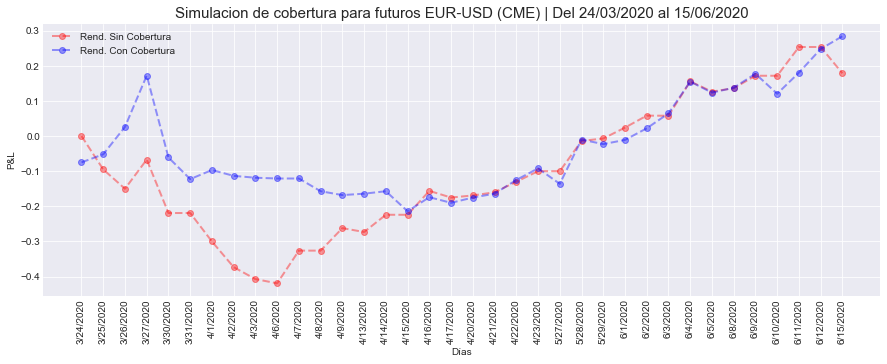

In [134]:
#Gráfica
plt.figure(figsize=(15,5))
ax=plt.axes()
plt.plot(closes_df["Rend. Sin Cobertura"], lw=2,color="red",linestyle="--", label='Rend. Sin Cobertura', marker='o', alpha=0.4)
plt.plot(closes_df["Rend. Con Cobertura"], lw=2, color="blue",linestyle="--",label='Rend. Con Cobertura', marker='o', alpha=0.4)
plt.legend(loc='best', fontsize=10)
plt.title("Simulacion de cobertura para futuros EUR-USD (CME) | Del 24/03/2020 al 15/06/2020",fontsize=15)
plt.xlabel('Días', fontsize=10)
plt.ylabel('P&L',fontsize=10)
plt.xticks(rotation=90)
plt.style.use("seaborn-darkgrid")
blue, = sns.color_palette("muted", 1)

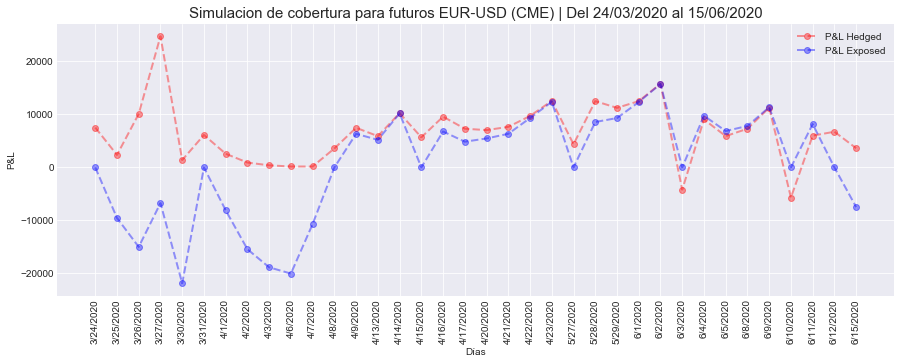

In [135]:
#Gráfica
plt.figure(figsize=(15,5))
ax=plt.axes()
plt.plot(closes_df["P&L Hedged"], lw=2,color="red",linestyle="--", label='P&L Hedged', marker='o', alpha=0.4)
plt.plot(closes_df["P&L Exposed"], lw=2, color="blue",linestyle="--",label='P&L Exposed', marker='o', alpha=0.4)
plt.legend(loc='best', fontsize=10)
plt.title("Simulacion de cobertura para futuros EUR-USD (CME) | Del 24/03/2020 al 15/06/2020",fontsize=15)
plt.xlabel('Días', fontsize=10)
plt.ylabel('P&L',fontsize=10)
plt.xticks(rotation=90)
plt.style.use("seaborn-darkgrid")
blue, = sns.color_palette("muted", 1)

In [138]:
ratio = backtest.loc[(backtest.FlagRatio== 1)]
ratio = ratio.set_index('Date')
ratio[["Balance sin Cobertura","Balance con Cobertura","Ratio"]]


,Balance sin Cobertura,Balance con Cobertura,Ratio
Date,,,
3/30/2020,78125.0,93875.0,1.200
4/14/2020,77644.0,84294.0,1.090
4/23/2020,90025.0,90813.0,1.010
6/9/2020,117150.0,117718.5,1.005
6/15/2020,117850.0,128393.5,1.089


### Limitaciones 

1. Tiempo de vencimiento de la prima
2. Umbral 
3. Ganancias limitadas vs. balance expuesto

### Ventajas

1. Se proje el capital 
2. Se pueden generar ganancias con las primas
3. Se reduce riesgo y drawdown

***
## Gracias 
***